In [9]:
# Import necessary libraries for preprocessing
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Load the dataset
#Atlanta_Distance = pd.read_pickle(r'~/Documents/NYCDSA/Capstone/Pickle Files/Atlanta_Nearest_POI.pkl')
Atlanta_Density = pd.read_csv('~/Documents/NYCDSA/Capstone/Density_Atlanta/Density_Atlanta.csv')
Atlanta_Density['Total Bathrooms'] = Atlanta_Density['number_of_full_baths'] + (Atlanta_Density['number_of_half_baths']*0.5)
Atlanta_Density = Atlanta_Density.drop(columns=['ID', 'source_property_id', 'year_built', 'source_name',
                                                  'listing_date', 'mls_id', 'census_zcta5_geoid',
                                                  'census_cbsa_geoid', 'latitude', 'longitude', 'lot_size_in_acres', 'number_of_full_baths', 'number_of_half_baths'])
Atlanta_Density = Atlanta_Density.rename(columns={'SM_One': 'Supermarket (One Mile)', 'C_One': 'Convenience (One Mile)',
'WS_One': 'Wholesale (One Mile)', 'VS_One': 'Variety Store (One Mile)', 'SC_One': 'Supercenter (One Mile)', 'number_of_bedrooms': 'Total Bedrooms', 'living_area_square_feet': 'Living Area(SQF)',
                                                   'lot_size_in_square_feet': 'Lot Size(SQF)', 'number_of_garage_spaces': 'Garage Spaces', 'number_of_stories': 'Stories',
                                                   'SM_Five': 'Supermarket (Five Miles)', 'C_Five': 'Convenience (Five Miles)',
'WS_Five': 'Wholesale (Five Miles)', 'VS_Five': 'Variety Store (Five Miles)', 'SC_Five': 'Supercenter (Five Miles)'})
Atlanta_Density_One = Atlanta_Density.drop(columns=['Wholesale (Five Miles)', 'Variety Store (Five Miles)', 'Supermarket (Five Miles)', 'Supercenter (Five Miles)', 'Convenience (Five Miles)'])
Atlanta_Density_One

,street_address,city,state,current_listing_price,Total Bedrooms,Living Area(SQF),Lot Size(SQF),has_pool,has_garage,Garage Spaces,Stories,story_indicator,Wholesale (One Mile),Variety Store (One Mile),Supermarket (One Mile),Supercenter (One Mile),Convenience (One Mile),Total Bathrooms
0,0 ivy MNR DR NW 0,Marietta,GA,2865,4,3259.0,14810.400390,False,True,NaN,2.0,Multi,0,0,0,0,0,2.5
1,1 10 buena VIS CIR SE,Cartersville,GA,2200,3,1993.0,NaN,False,False,NaN,NaN,NaN,0,2,0,1,2,2.0
2,1 1088 coldwater DR,Griffin,GA,2000,3,1910.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
3,1 1130 willivee DR,Decatur,GA,1995,3,1134.0,NaN,False,False,NaN,NaN,NaN,0,0,0,0,0,1.0
4,1 1307 idlewood CT,Mcdonough,GA,2800,4,2532.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21021,procurement only - 66 4th ST,Newnan,GA,1600,3,1367.0,NaN,False,True,NaN,NaN,NaN,0,0,0,0,0,2.0
21022,r2188 executive DR,Duluth,GA,2199,3,1696.0,871.199981,False,False,NaN,NaN,NaN,0,0,1,0,1,2.5
21023,r3339 woodward down,Buford,GA,2380,3,1944.0,4356.000065,False,False,NaN,NaN,NaN,1,1,1,1,0,3.5
21024,singleunit 216 greensprings DR,Palmetto,GA,1900,4,1204.0,NaN,False,False,NaN,NaN,NaN,0,1,0,0,1,2.0


In [10]:
# Exclude 'current_listing_price' from features
numeric_features = Atlanta_Density_One.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
#categorical_features = list(Atlanta_Distance.columns[Atlanta_Distance.dtypes == 'object'])

In [11]:
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for nominal categorical features: Fill missing values with 'None' then apply one-hot encoding
#categorical_transformer = Pipeline(steps=[
    #('impute_none', SimpleImputer(strategy='constant', fill_value='None')),  # Using SimpleImputer
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_One)

In [12]:
# Generate column names for the one-hot encoded features
#onehot_features = preprocessor.named_transformers_['nominal'].named_steps['onehot'].get_feature_names_out()
# Combine all feature names
all_feature_names = list(numeric_features)
all_feature_names

['Total Bedrooms',
 'Living Area(SQF)',
 'Lot Size(SQF)',
 'Garage Spaces',
 'Stories',
 'Wholesale (One Mile)',
 'Variety Store (One Mile)',
 'Supermarket (One Mile)',
 'Supercenter (One Mile)',
 'Convenience (One Mile)',
 'Total Bathrooms']

In [13]:
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)
transformed_df

,Total Bedrooms,Living Area(SQF),Lot Size(SQF),Garage Spaces,Stories,Wholesale (One Mile),Variety Store (One Mile),Supermarket (One Mile),Supercenter (One Mile),Convenience (One Mile),Total Bathrooms
0,0.641572,1.314402,-0.032974,-7.852071e-16,0.00498,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,0.050733
1,-0.459448,0.111674,0.000000,-7.852071e-16,0.00000,-0.093701,2.854824,-0.527845,3.756596,1.972893,-0.167403
2,-0.459448,0.032822,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
3,-0.459448,-0.704394,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.603676
4,0.641572,0.623736,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
...,...,...,...,...,...,...,...,...,...,...,...
21021,-0.459448,-0.483039,0.000000,-7.852071e-16,0.00000,-0.093701,-0.411516,-0.527845,-0.229586,-0.376832,-0.167403
21022,-0.459448,-0.170482,-0.033370,-7.852071e-16,0.00000,-0.093701,-0.411516,0.857559,-0.229586,0.798031,0.050733
21023,-0.459448,0.065123,-0.033271,-7.852071e-16,0.00000,10.672215,1.221654,0.857559,3.756596,-0.376832,0.487006
21024,0.641572,-0.637893,0.000000,-7.852071e-16,0.00000,-0.093701,1.221654,-0.527845,-0.229586,0.798031,-0.167403


In [14]:
from sklearn.ensemble import RandomForestRegressor
# Assuming RandomForest is part of your models dictionary
random_forest_model = RandomForestRegressor(random_state = 42)
# Define the full model pipeline including the preprocessor and RandomForestRegressor
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', random_forest_model)
])
# Fit the model pipeline
random_forest_pipeline.fit(Atlanta_Density_One.drop(columns='current_listing_price'), Atlanta_Density_One['current_listing_price'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (One Mile)', 'Variety Store (One Mile)',
       'Supermarket (One Mile)', 'Supercenter (One Mile)',
       'Convenience (One Mile)', 'Total Bathrooms'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [15]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(random_forest_pipeline, Atlanta_Density_One.drop(columns='current_listing_price'), Atlanta_Density_One['current_listing_price'], scoring = 'r2', cv=kf, n_jobs = -1)
print('Avg Score:',np.mean(scores))

Avg Score: 0.46971298883291246


In [16]:
feature_importances = random_forest_pipeline.named_steps['regressor'].feature_importances_

In [17]:
# Function to extract feature names from ColumnTransformer
def get_feature_names(column_transformer):
    """Generate feature names from a ColumnTransformer"""
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:  # the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1], Pipeline):
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names_out(raw_col_name)
        except AttributeError:  # if no 'get_feature_names_out' function, use raw column name
            names = raw_col_name
        if isinstance(names, np.ndarray):
            col_name.extend(names.tolist())
        else:
            col_name.extend(names)
    return col_name
# Apply function to get feature names
feature_names = get_feature_names(preprocessor)
# Create a DataFrame to view feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Display the sorted DataFrame
importance_df

,Feature,Importance
1,Living Area(SQF),0.430023
2,Lot Size(SQF),0.148943
10,Total Bathrooms,0.146963
9,Convenience (One Mile),0.064044
4,Stories,0.051044
0,Total Bedrooms,0.050548
7,Supermarket (One Mile),0.048576
3,Garage Spaces,0.025458
6,Variety Store (One Mile),0.022660
8,Supercenter (One Mile),0.010058


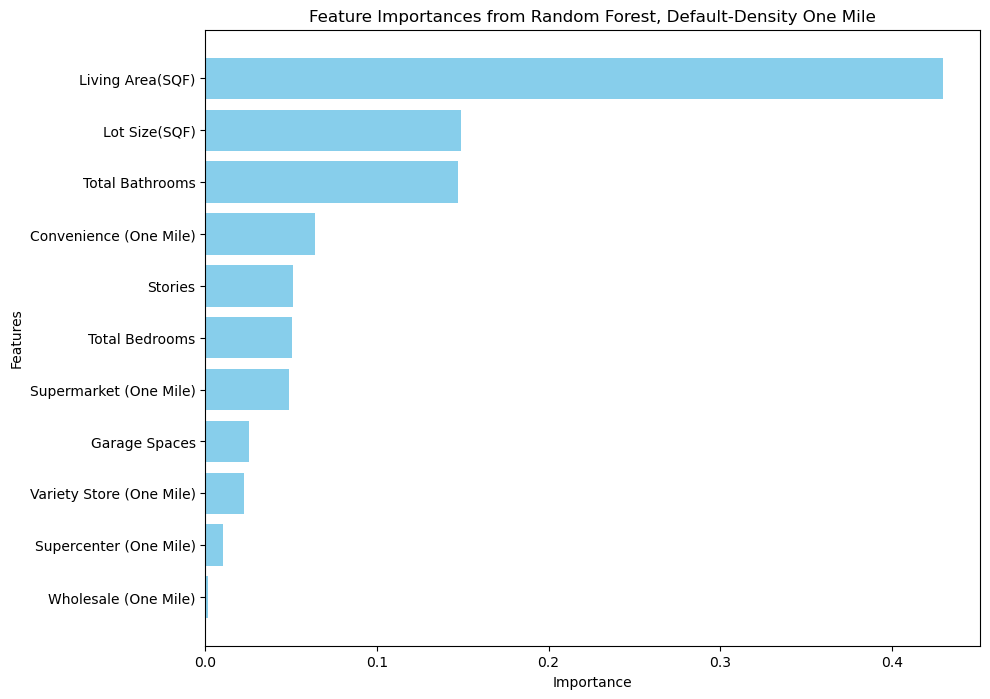

In [18]:
import matplotlib.pyplot as plt
# Sort the DataFrame by importance (if not already sorted)
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select the top N features for a cleaner graph, you can adjust N based on your needs
top_n = 25
top_features = importance_df.head(top_n)
# Create a bar plot for the feature importances
plt.figure(figsize=(10, 8))  # Set the figure size (width, height in inches)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest, Default-Density One Mile')
plt.gca().invert_yaxis()  # Invert the Y-axis to show the highest values at the top
plt.show()

In [19]:
param_grid = {'regressor__n_estimators': [140, 150, 160], 
                                 'regressor__max_depth': [None],
                                 'regressor__min_samples_leaf': [1], 
                                 'regressor__max_features': [None],
                                 'regressor__min_samples_split': [2]  # Minimum number of data points allowed in a leaf node
}
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(Atlanta_Density_One.drop(columns='current_listing_price'), Atlanta_Density_One['current_listing_price'])

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (One Mile)', 'Variety Store (One Mile)',
       '...ile)', 'Supercenter (One Mile)',
       'Convenience (One Mile)', 'Total Bathrooms'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None],
                         'regressor__max_features': [None],
                         'regressor__min_samples_leaf': [1],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [140, 150, 160]},
             verbose=2)

In [20]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
# Get the best estimator
best_rf = grid_search.best_estimator_
print("Best estimator:", best_rf)
# Optionally, review the best score (which is the mean cross-validated score of the best_estimator)
best_score = grid_search.best_score_
print("Best score (R2):", best_score)

Best parameters: {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 160}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (One Mile)', 'Variety Store (One Mile)',
       'Supermarket (One Mile)', 'Supercenter (One Mile)',
       'Convenience (One Mile)', 'Total Bathrooms'],
      dtype='object'))])),
                ('regressor',
            

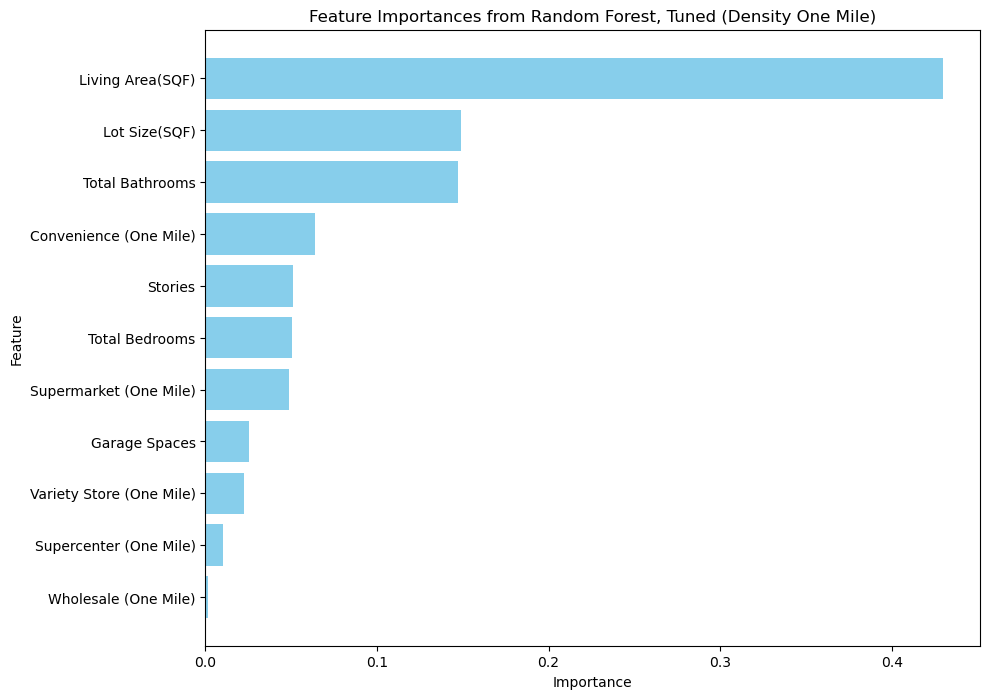

In [22]:
import matplotlib.pyplot as plt
# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:25], importance_df['Importance'][:25], color='skyblue')  # Top 20 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest, Tuned (Density One Mile)')
plt.gca().invert_yaxis()
plt.show()

In [23]:
Atlanta_Density_Five = Atlanta_Density.drop(columns=['Wholesale (One Mile)', 'Variety Store (One Mile)', 'Supermarket (One Mile)', 'Supercenter (One Mile)', 'Convenience (One Mile)'])
numeric_features = Atlanta_Density_Five.select_dtypes(include=['int64', 'float64']).drop(columns=['current_listing_price']).columns
# Helper function to fill 'None' for missing categorical data
def fill_none(X):
    return X.fillna("None")

# Pipeline for numeric features: Impute missing values using mean
numeric_transformer = Pipeline(steps=[
    ('impute_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combined preprocessor for numeric and nominal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('nominal', categorical_transformer, categorical_features)
])

transformed_data = preprocessor.fit_transform(Atlanta_Density_Five)

In [24]:
# Combine all feature names
all_feature_names = list(numeric_features)
transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

In [25]:
# Assuming RandomForest is part of your models dictionary
random_forest_model = RandomForestRegressor(random_state = 42)
# Define the full model pipeline including the preprocessor and RandomForestRegressor
random_forest_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', random_forest_model)
])
# Fit the model pipeline
random_forest_pipeline.fit(Atlanta_Density_Five.drop(columns='current_listing_price'), Atlanta_Density_Five['current_listing_price'])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (Five Miles)', 'Variety Store (Five Miles)',
       'Supermarket (Five Miles)', 'Supercenter (Five Miles)',
       'Convenience (Five Miles)', 'Total Bathrooms'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [26]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(random_forest_pipeline, Atlanta_Density_Five.drop(columns='current_listing_price'), Atlanta_Density_Five['current_listing_price'], scoring = 'r2', cv=kf, n_jobs = -1)
print('Avg Score:',np.mean(scores))

Avg Score: 0.6042558302555696


In [27]:
feature_importances = random_forest_pipeline.named_steps['regressor'].feature_importances_

In [28]:
# Function to extract feature names from ColumnTransformer
def get_feature_names(column_transformer):
    """Generate feature names from a ColumnTransformer"""
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:  # the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1], Pipeline):
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names_out(raw_col_name)
        except AttributeError:  # if no 'get_feature_names_out' function, use raw column name
            names = raw_col_name
        if isinstance(names, np.ndarray):
            col_name.extend(names.tolist())
        else:
            col_name.extend(names)
    return col_name
# Apply function to get feature names
feature_names = get_feature_names(preprocessor)
# Create a DataFrame to view feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Display the sorted DataFrame
importance_df

,Feature,Importance
1,Living Area(SQF),0.353291
7,Supermarket (Five Miles),0.171268
10,Total Bathrooms,0.134982
2,Lot Size(SQF),0.084483
6,Variety Store (Five Miles),0.075491
0,Total Bedrooms,0.041226
8,Supercenter (Five Miles),0.038628
4,Stories,0.034761
9,Convenience (Five Miles),0.031359
5,Wholesale (Five Miles),0.018659


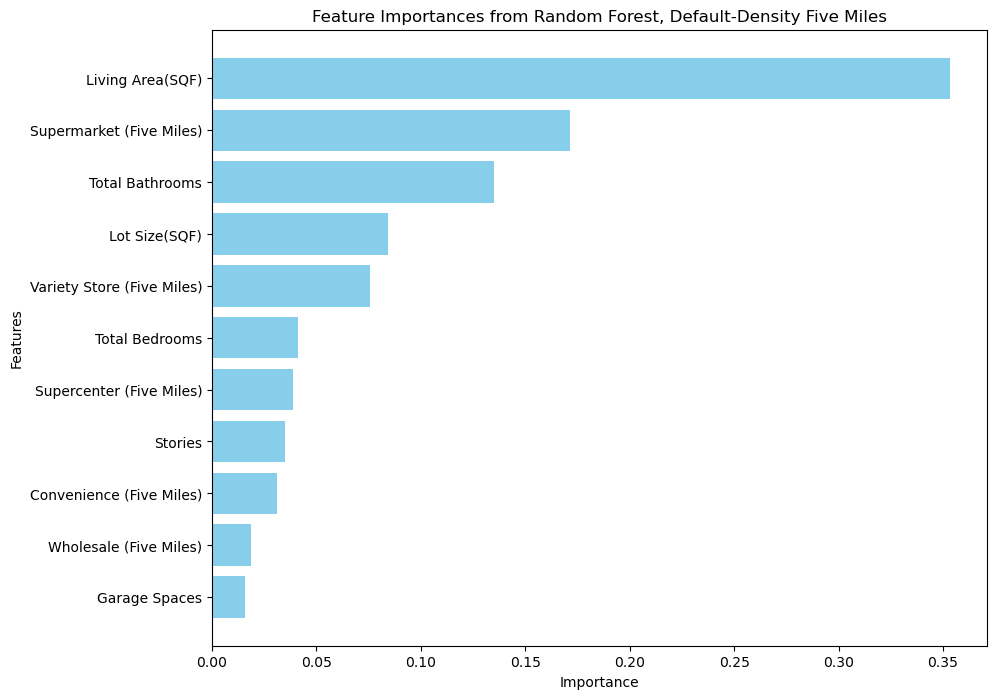

In [29]:
import matplotlib.pyplot as plt
# Sort the DataFrame by importance (if not already sorted)
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select the top N features for a cleaner graph, you can adjust N based on your needs
top_n = 25
top_features = importance_df.head(top_n)
# Create a bar plot for the feature importances
plt.figure(figsize=(10, 8))  # Set the figure size (width, height in inches)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest, Default-Density Five Miles')
plt.gca().invert_yaxis()  # Invert the Y-axis to show the highest values at the top
plt.show()

In [30]:
param_grid = {'regressor__n_estimators': [140, 150, 160], 
                                 'regressor__max_depth': [None],
                                 'regressor__min_samples_leaf': [1], 
                                 'regressor__max_features': [None],
                                 'regressor__min_samples_split': [2]  # Minimum number of data points allowed in a leaf node
}
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(Atlanta_Density_Five.drop(columns='current_listing_price'), Atlanta_Density_Five['current_listing_price'])

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (Five Miles)', 'Variety Store (Five Miles)',
       'Supermarket (Five Miles)', 'Supercenter (Five Miles)',
       'Convenience (Five Miles)', 'Total Bathrooms'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None],
                         'regressor__max_features': [None],
                         'regressor__min_samples_leaf': [1],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [140, 150, 160]},
             verbose=2)

In [31]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)
# Get the best estimator
best_rf = grid_search.best_estimator_
print("Best estimator:", best_rf)
# Optionally, review the best score (which is the mean cross-validated score of the best_estimator)
best_score = grid_search.best_score_
print("Best score (R2):", best_score)

Best parameters: {'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 160}
Best estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Total Bedrooms', 'Living Area(SQF)', 'Lot Size(SQF)', 'Garage Spaces',
       'Stories', 'Wholesale (Five Miles)', 'Variety Store (Five Miles)',
       'Supermarket (Five Miles)', 'Supercenter (Five Miles)',
       'Convenience (Five Miles)', 'Total Bathrooms'],
      dtype='object'))])),
                ('regressor',
  

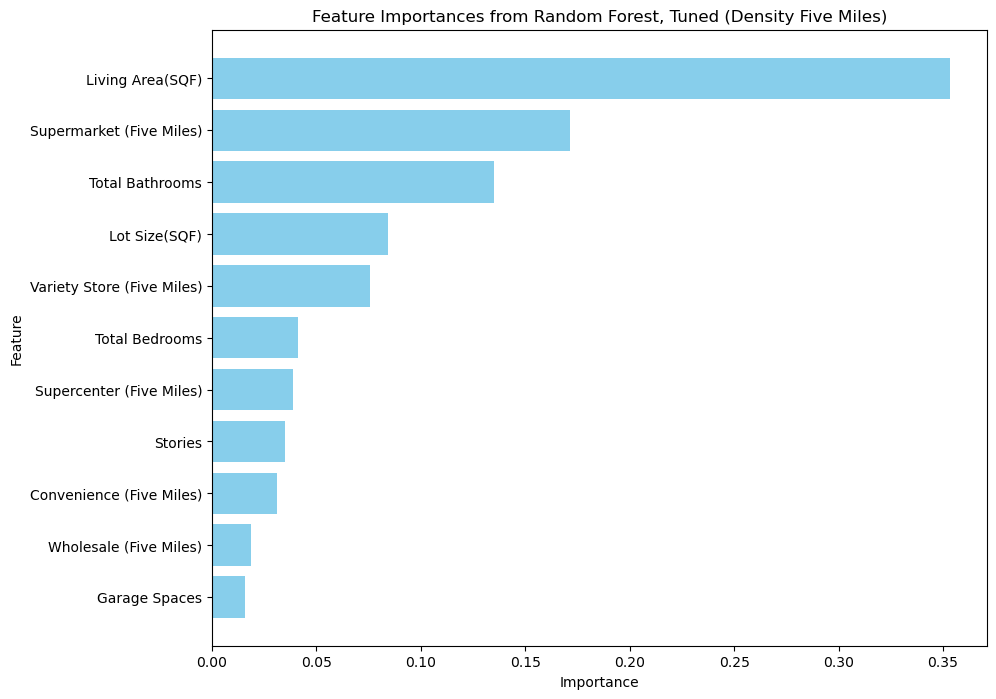

In [33]:
import matplotlib.pyplot as plt
# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:25], importance_df['Importance'][:25], color='skyblue')  # Top 20 features
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest, Tuned (Density Five Miles)')
plt.gca().invert_yaxis()
plt.show()